# CAPSTONE UAS Bengkel Koding DS-06

- Nama: Muhammad Rendy Ramadhan
- Nim: A11.2022.14590
- Kelas: DS-06

#1. Exploratory Data Analysis (EDA)
- Menampilkan beberapa baris pertama dan informasi umum dataset seperti jumlah
baris, kolom, deskripsi data dan tipe data.
- Menampilkan visualisasi data.
- Mengecek keberadaan missing values, unique value, data duplikat, keseimbangan
data, dan deteksi outlier menggunakan boxplot dan menanganinya.
- Membuat kesimpulan dari proses yang dilakukan pada tahap ini.

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#membaca dataset
df = pd.read_csv('ObesityDataSet.csv', sep=',', skipinitialspace=True, na_values="?")

In [3]:
#menampilkan data
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [5]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [6]:
# Ubah tipe data numerik
numeric_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

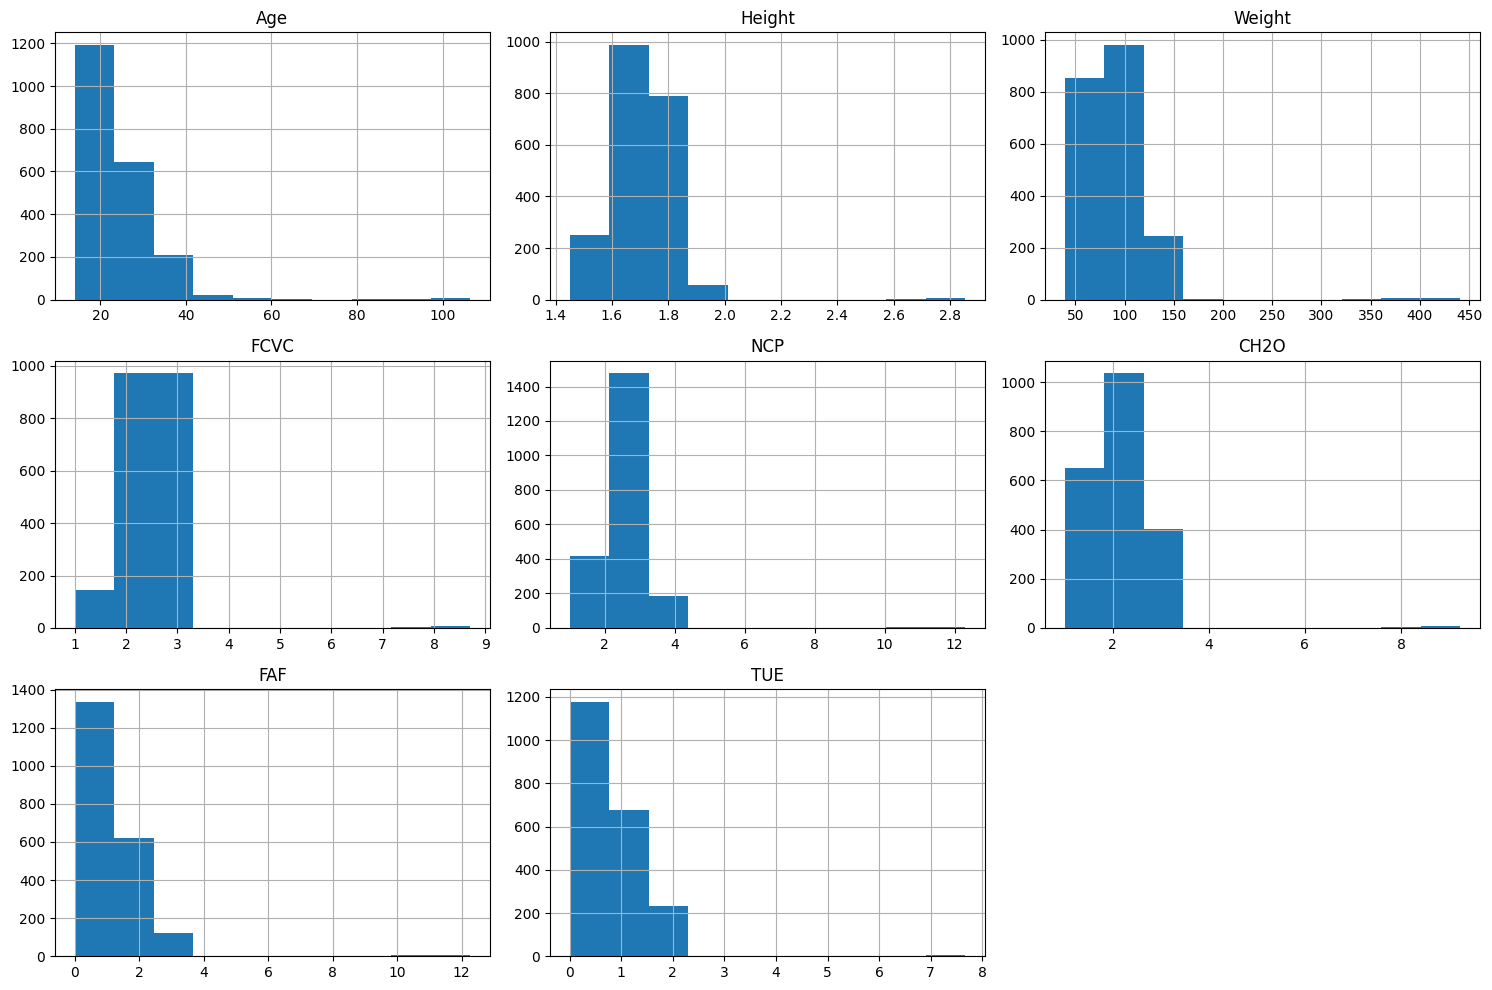

In [7]:
# Visualisasi data numerik dengan histogram
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [8]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Memeriksa nilai non-numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Nilai non-numerik dalam kolom Age:
[nan]

Nilai non-numerik dalam kolom Height:
[nan]

Nilai non-numerik dalam kolom Weight:
[nan]

Nilai non-numerik dalam kolom FCVC:
[nan]

Nilai non-numerik dalam kolom NCP:
[nan]

Nilai non-numerik dalam kolom CH2O:
[nan]

Nilai non-n

In [9]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk Age:
Min: 14.0, Max: 106.4412521246347

Range nilai untuk Height:
Min: 1.45, Max: 2.853986075232335

Range nilai untuk Weight:
Min: 39.0, Max: 441.1310776586406

Range nilai untuk FCVC:
Min: 1.0, Max: 8.706794695591519

Range nilai untuk NCP:
Min: 1.0, Max: 12.299828447218044

Range nilai untuk CH2O:
Min: 1.0, Max: 9.23329438001147

Range nilai untuk FAF:
Min: 0.0, Max: 12.270274762078117

Range nilai untuk TUE:
Min: 0.0, Max: 7.669504206178693

Kategori unik dalam Gender:
['Female' 'Male' nan]

Kategori unik dalam CALC:
['no' 'Sometimes' 'Frequently' nan 'Always']

Kategori unik dalam FAVC:
['no' 'yes' nan]

Kategori unik dalam SCC:
['no' 'yes' nan]

Kategori unik dalam SMOKE:
['no' 'yes' nan]

Kategori unik dalam family_history_with_overweight:
['yes' 'no' nan]

Kategori unik dalam CAEC:
['Sometimes' 'Frequently' 'Always' 'no' nan]

Kategori unik dalam MTRANS:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' nan]

Kategori unik dalam NObeyesdad:
[

In [10]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 18


In [11]:
# Distribusi target variable
df['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64

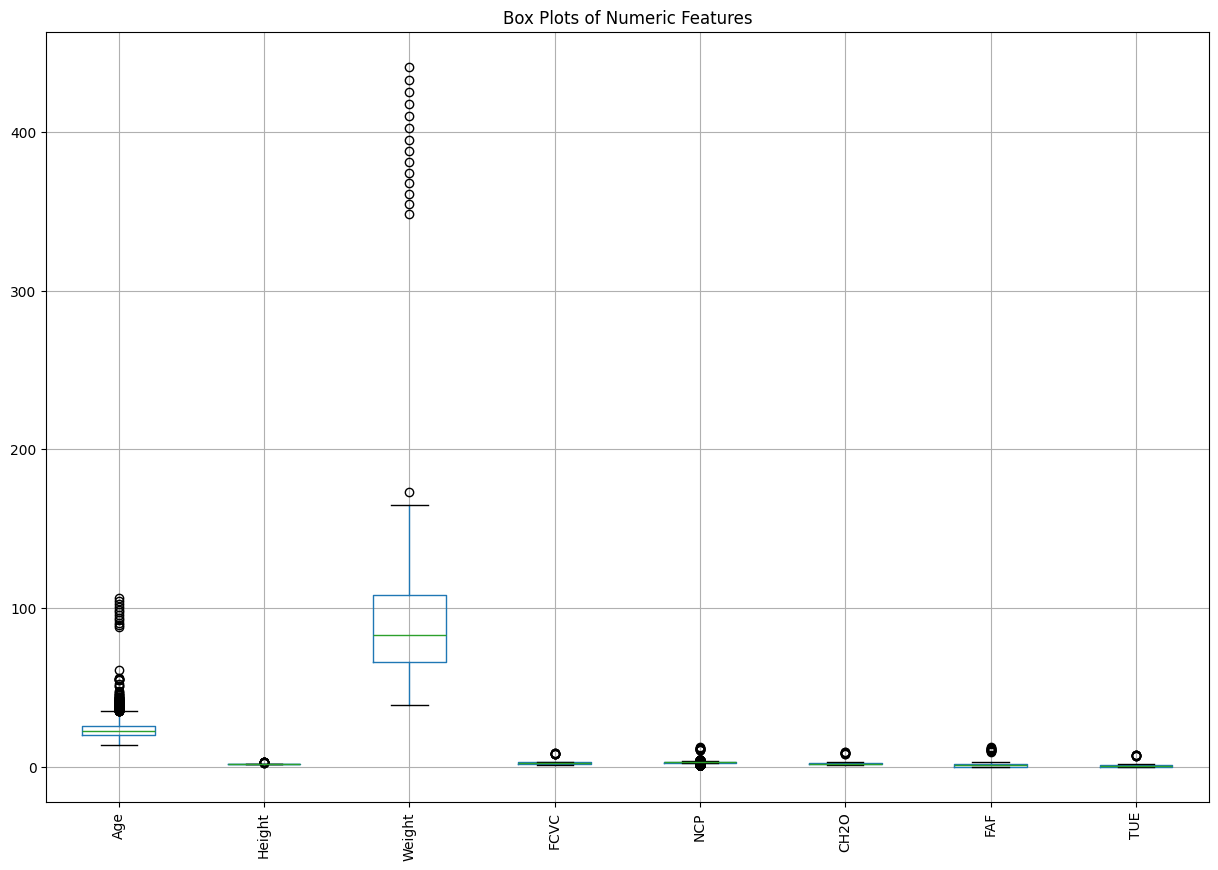

In [12]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

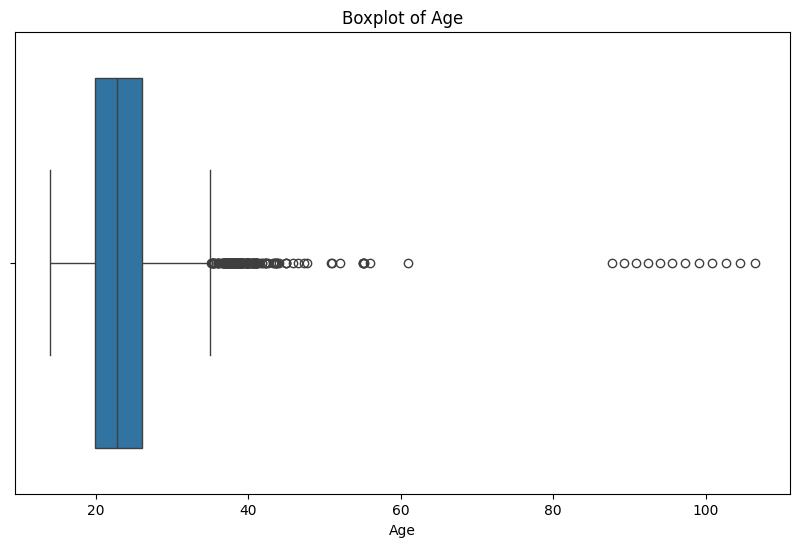

Outliers pada Age sudah dihandel.


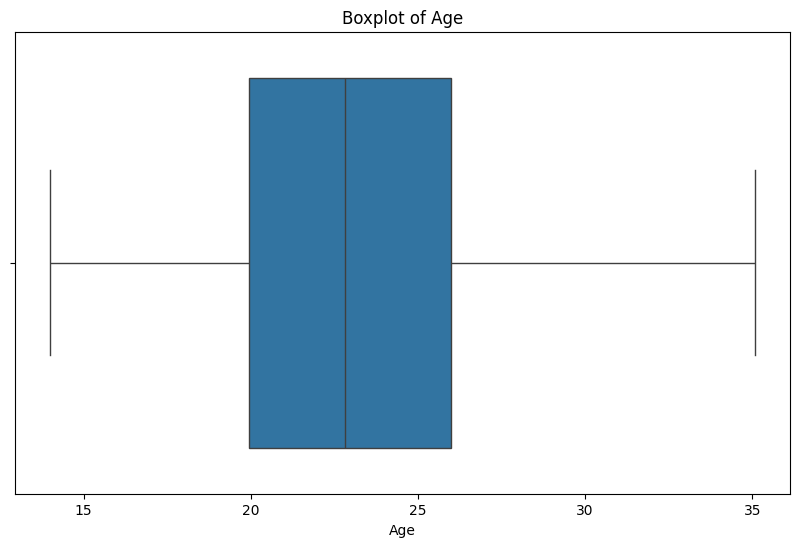

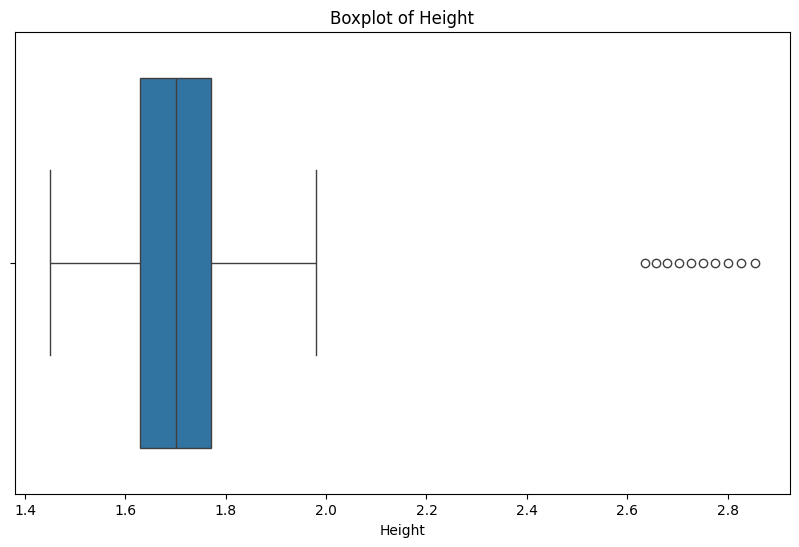

Outliers pada Height sudah dihandel.


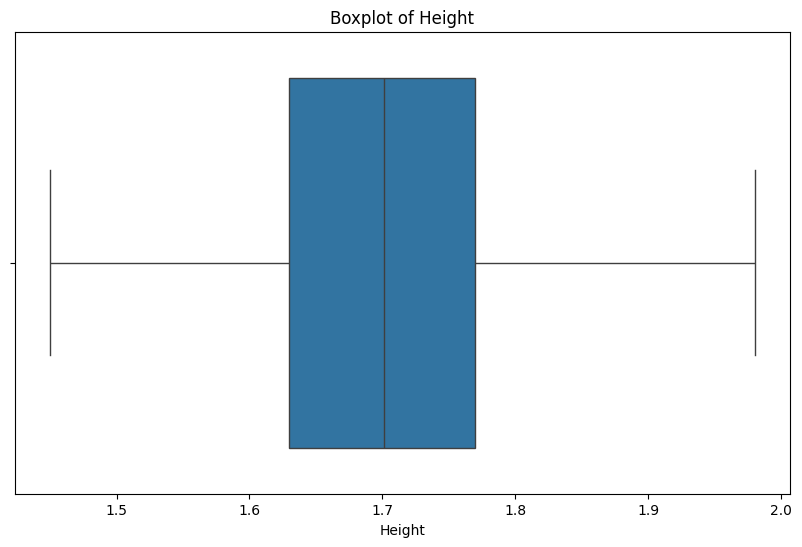

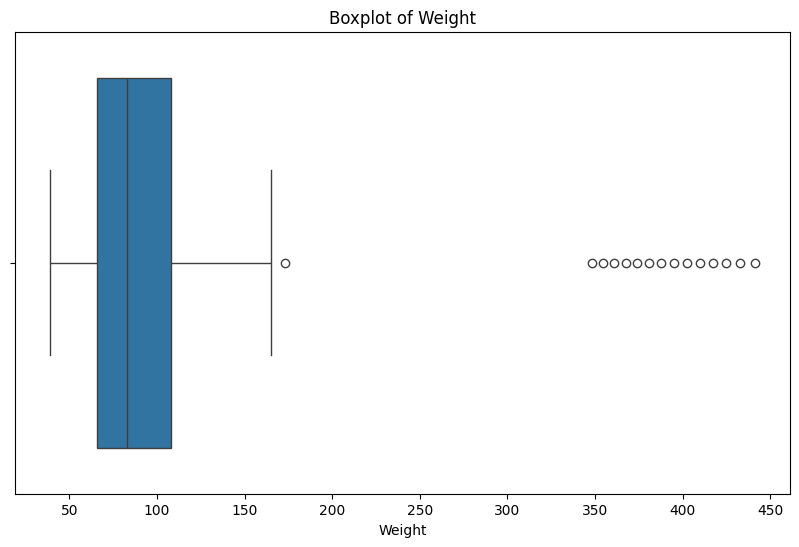

Outliers pada Weight sudah dihandel.


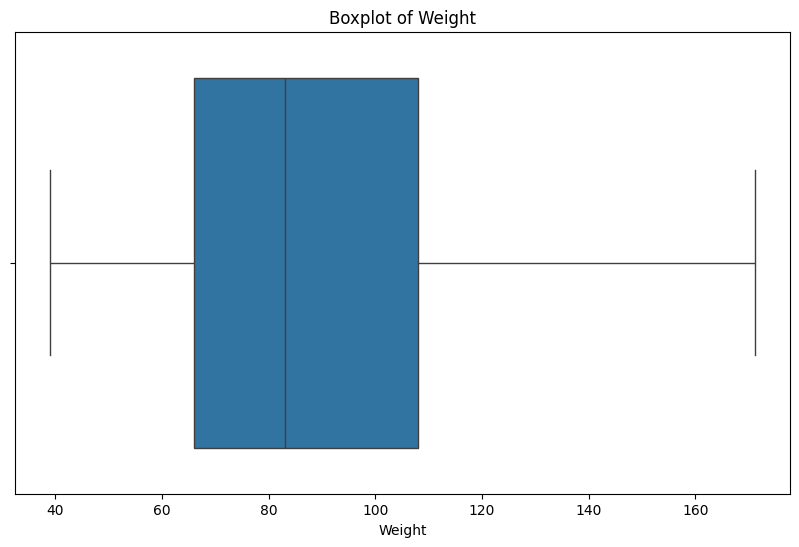

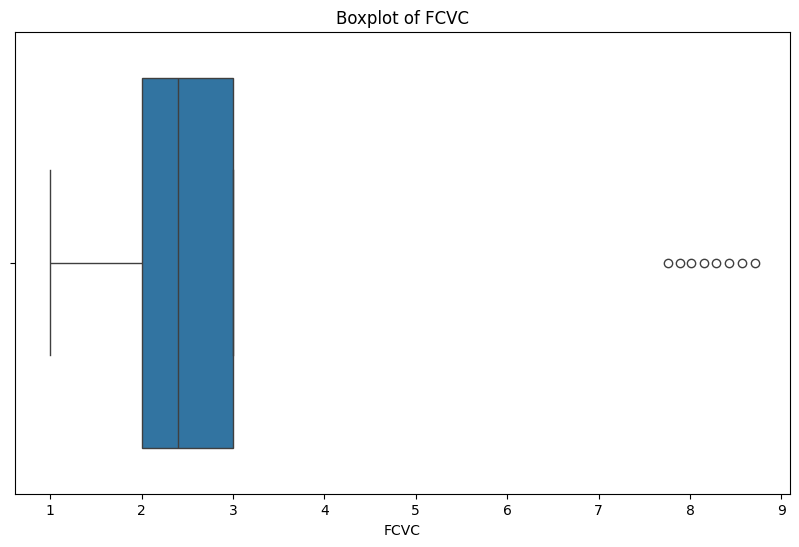

Outliers pada FCVC sudah dihandel.


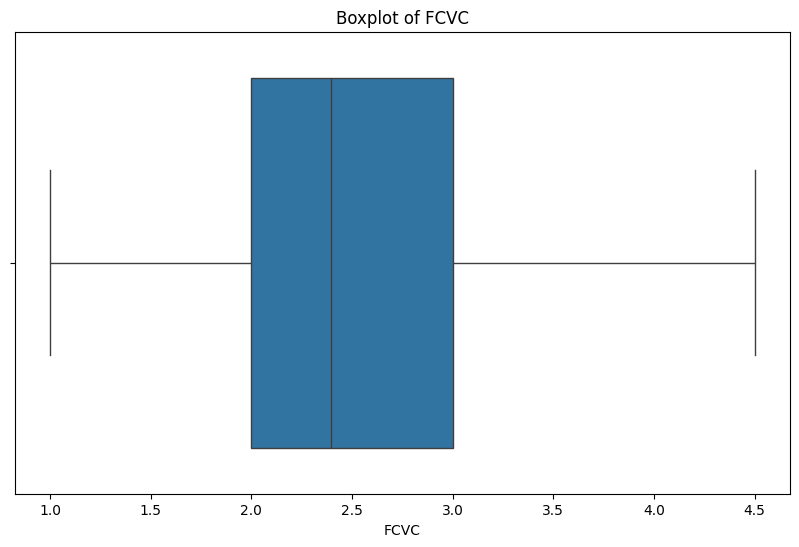

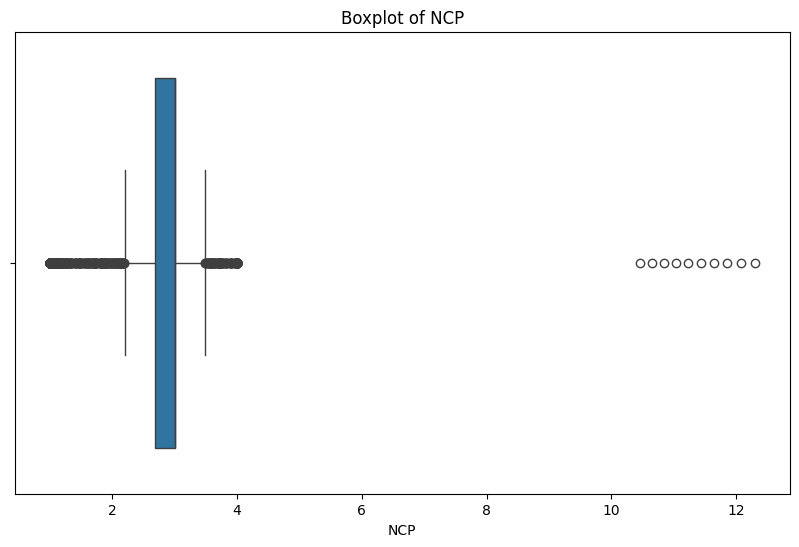

Outliers pada NCP sudah dihandel.


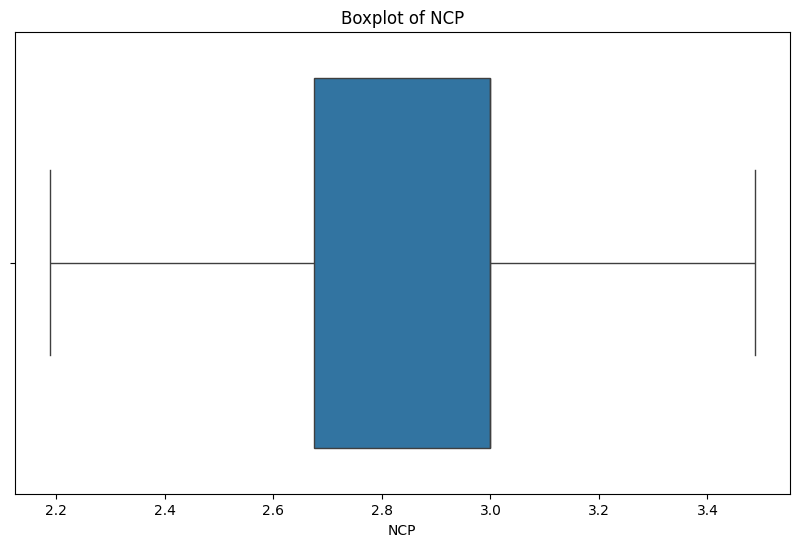

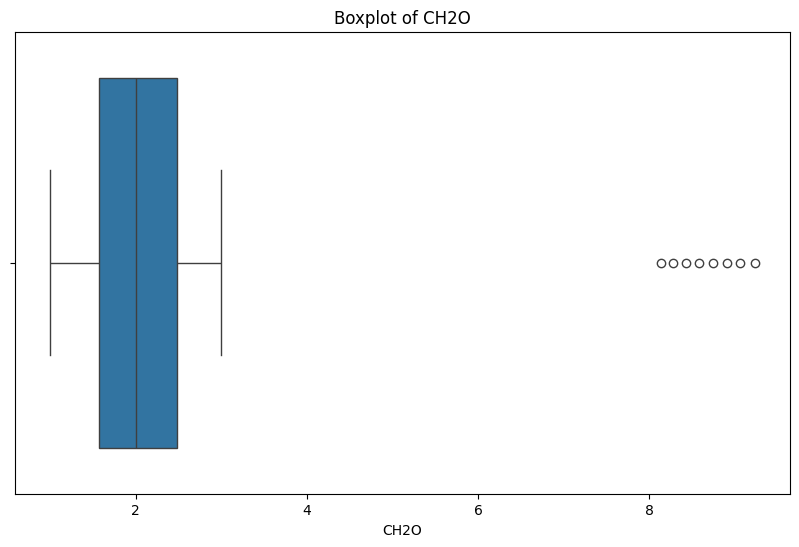

Outliers pada CH2O sudah dihandel.


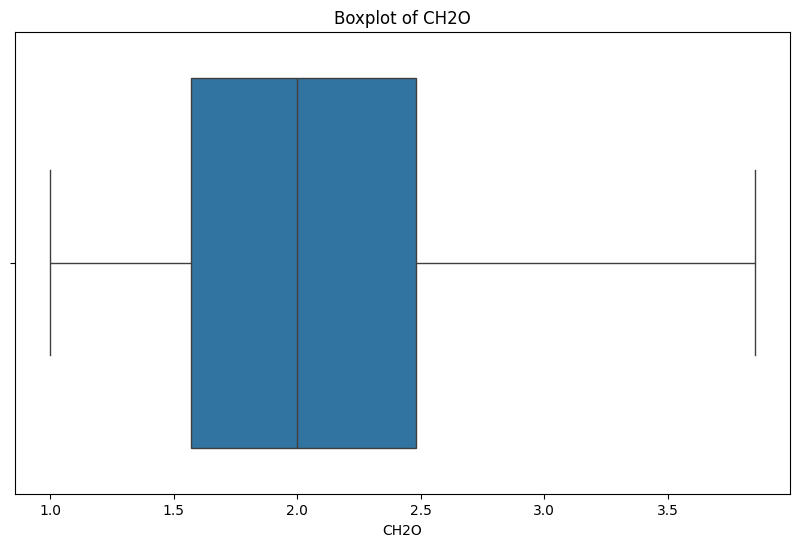

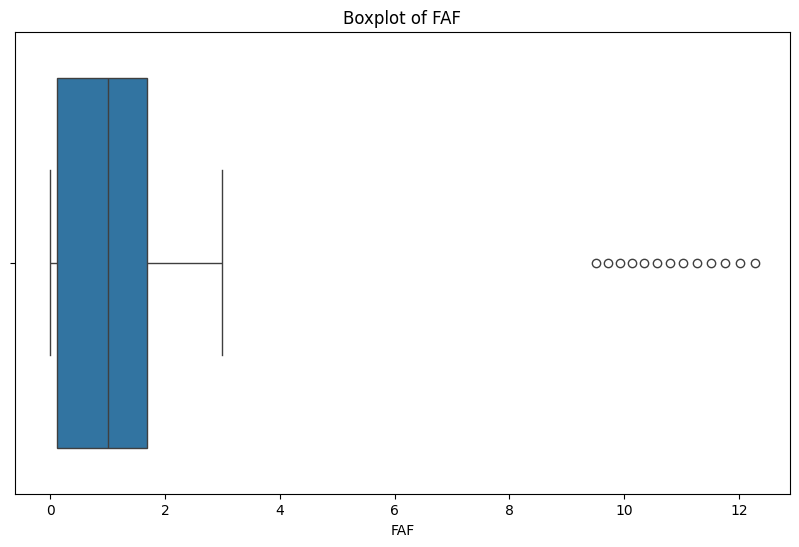

Outliers pada FAF sudah dihandel.


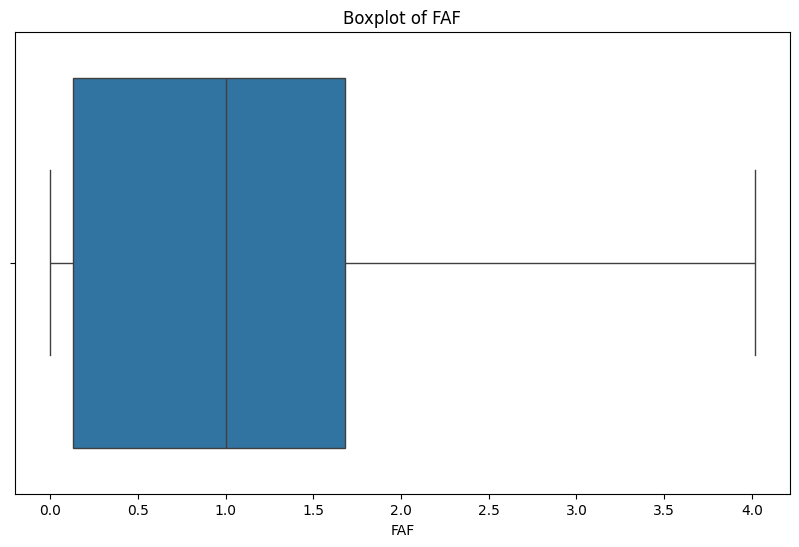

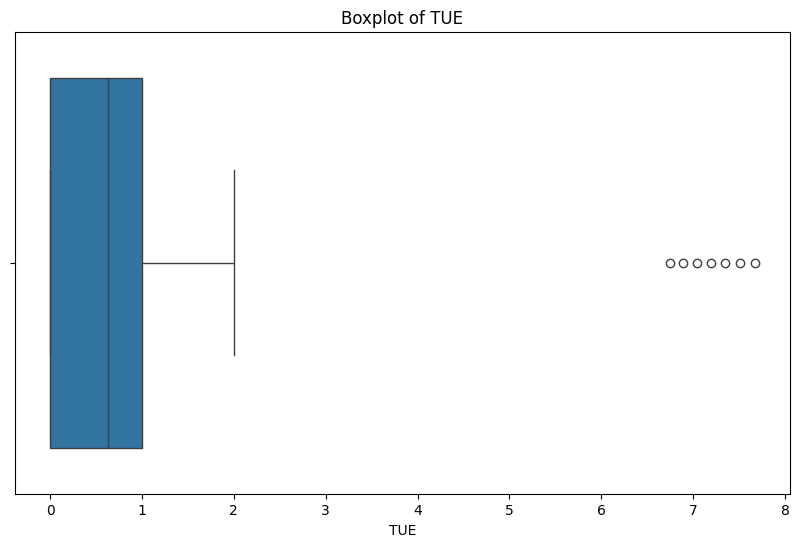

Outliers pada TUE sudah dihandel.


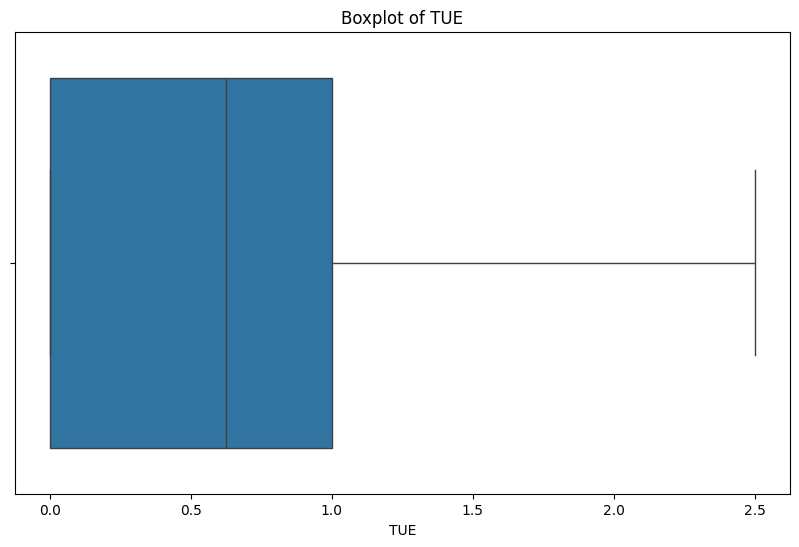

In [13]:
#menangani outlier

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Contoh untuk kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plot_boxplot(df, column)

    # Menangani outlier dengan IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound,
                          np.where(df[column] < lower_bound, lower_bound, df[column]))

    print(f"Outliers pada {column} sudah dihandel.")
    plot_boxplot(df, column)

Kesimpulan dari EDA:
1. Dataset berisi beberapa fitur numerik (Age, Height, Weight, NCP, CH2O, FAF, TUE) dan kategori (Gender, FAVC, FCVC, CAEC, SCC, SMOKE, family_history_with_overweight, CALC, MTRANS, MTRANS).
2. Ditemukan nilai kosong (“?”) pada beberapa kolom—total ratusan missing values—yang perlu ditangani/didrop.
3. Visualisasi Histogram tiap fitur numerik menunjukkan rentang dan sebarannya
4. Pada dataset data duplikatnya sedikit
5. Cek range (min-max) dan boxplot untuk mengecek outlier di beberapa kolom dan distribusi kelas target NObeyesdad juga tidak seimbang (imbalance)

#2. Preprocessing Data
- Menangani missing values, error, duplikasi, dan outlier (sudah ditangani) di setiap kolom.
- Mengubah data kategori menjadi numerik.
- Menentukan apakah semua feature perlu digunakan.
- Mengatasi ketidakseimbangan kelas data.
- Melakukan normalisasi atau standarisasi data.
- Membuat kesimpulan dari proses yang dilakukan pada tahap ini.

In [14]:
# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        # Untuk kolom numerik, isi dengan median
        df[column] = df[column].fillna(df[column].median())

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())


Missing values setelah pembersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [15]:
# menghapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris setelah menghapus duplikat: 2090


In [16]:
# Menentukan tipe data categorical
nominal_data = ['Gender', 'MTRANS']
ordinal_data = ['CAEC', 'CALC', 'NObeyesdad']
binomial_data = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

In [17]:
# Import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding Data Ordinal
for col in ordinal_data:
    df[col] = le.fit_transform(df[col])

# Encoding Data Binomial
for col in binomial_data:
    df[col] = le.fit_transform(df[col])
    
# Encoding Data Nominal
df = pd.get_dummies(df, columns=nominal_data)

In [18]:
df.head()

,Age,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,...,TUE,CAEC,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,3,0,2.0,3.000000,0,0,2.0,...,1.0,2,1,True,False,False,False,False,True,False
1,21.0,1.52,56.0,2,0,3.0,3.000000,1,1,3.0,...,0.0,2,1,True,False,False,False,False,True,False
2,23.0,1.80,77.0,1,0,2.0,3.000000,0,0,2.0,...,1.0,2,1,False,True,False,False,False,True,False
3,27.0,1.80,87.0,1,0,3.0,3.000000,0,0,2.0,...,0.0,2,5,False,True,False,False,False,False,True
4,22.0,1.78,89.8,2,0,2.0,2.188528,0,0,2.0,...,0.0,2,6,False,True,False,False,False,True,False


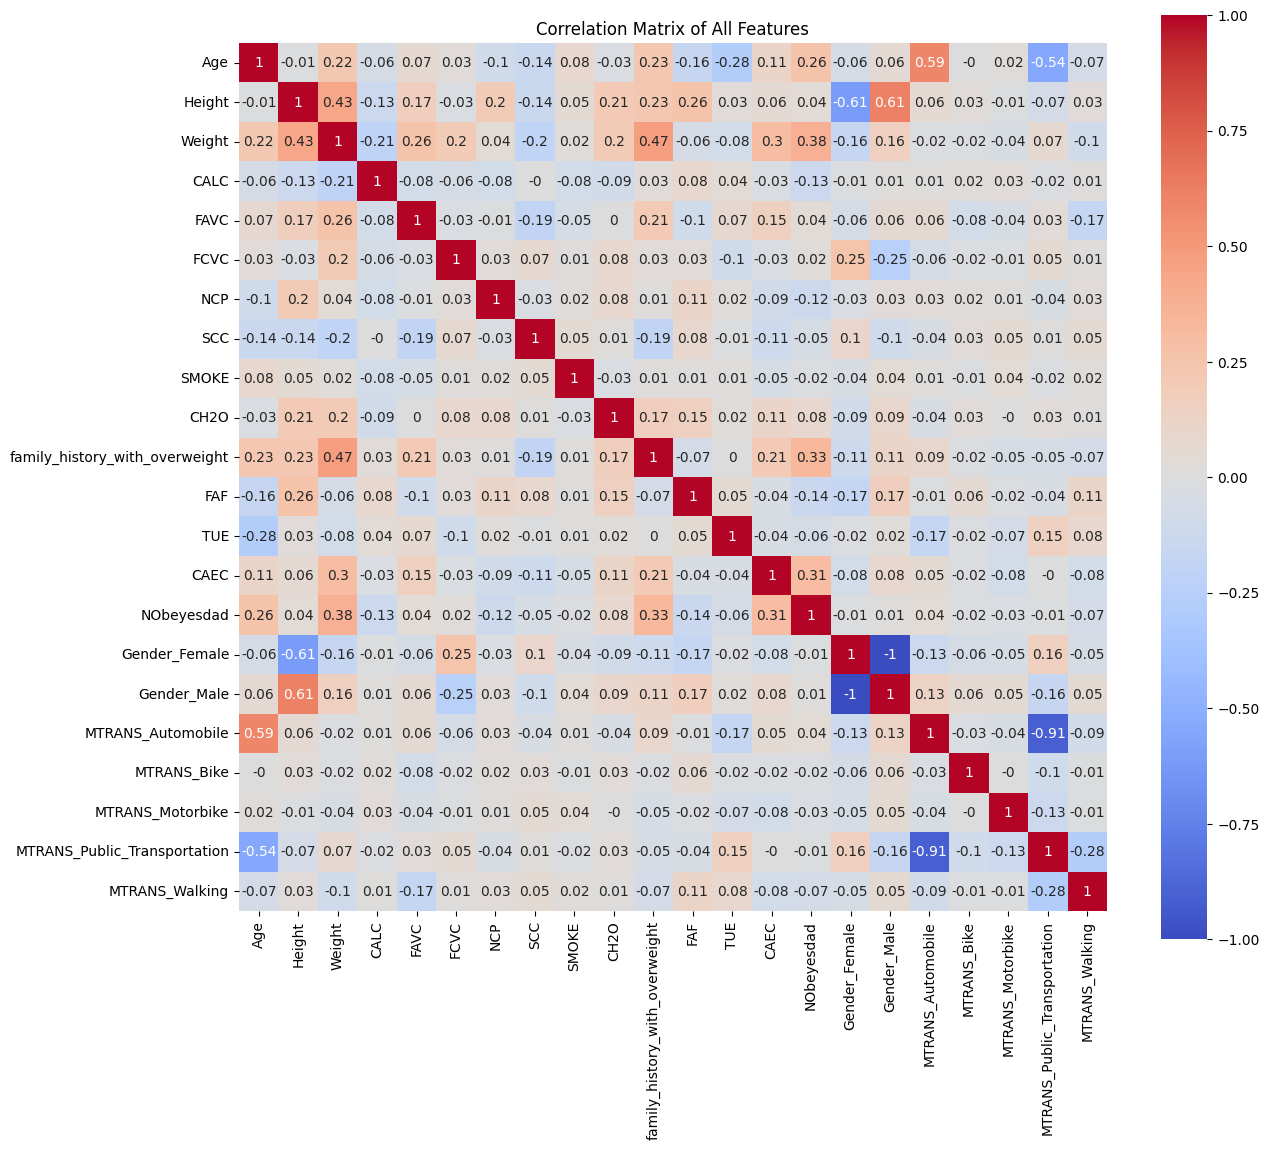

In [19]:
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()

sns.heatmap(
    correlation_matrix.round(2),
    annot=True,
    cmap='coolwarm',
    square=True,
    vmin=-1, vmax=1,
    cbar=True
)
plt.title('Correlation Matrix of All Features')
plt.show()

#Menentukan apakah semua feature perlu digunakan.

Kesimpulan dari Praprocessing Data:
1. Menangani missing values: isi kategori dengan modus, isi numerik dengan median; setelah itu semua kolom bersih dari NaN.
2. Menghapus duplikat agar tidak ada baris berulang.
3. Menangani outlier: menggunakan metode IQR (nilai di-cap ke batas bawah/atas) untuk mencegah pengaruh ekstrem.
4. Encoding: label-encode target NObeyesdad, one-hot encode kolom kategori (drop_first=True).

#3. Pemodelan dan Evaluasi
- Melakukan pemodelan menggunakan minimal 3 algoritma klasifikasi. - - - -
- Mengomparasi hasilnya satu sama lain.  
- Melakukan evaluasi dengan menggunakan confusion matrix, akurasi, presisi,
recall, dan F1- score.
- Menampilkan visualisasi perbandingan performa antar model.
- Membuat kesimpulan dari proses yang dilakukan pada tahap ini.

In [20]:
#STEP 1
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, f1_score, confusion_matrix

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [22]:
print(list(X_train.columns)) 

['Age', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'Gender_Female', 'Gender_Male', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Setelah SMOTE (resampling data training)
scaler = MinMaxScaler()

X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res_scaled, y_train_res)

# STEP 5: Prediksi data testing yang sudah diskalakan
y_pred_dt = dt_model.predict(X_test_scaled)

In [24]:
#STEP 3

print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("F1-Score:", f1_score(y_test, y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.9019138755980861
Precision: 0.9019138755980861
Recall: 0.9019138755980861
F1-Score: 0.9019138755980861

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.78      0.81      0.79        57
           2       0.91      0.96      0.93        70
           3       0.98      0.93      0.96        59
           4       0.98      0.98      0.98        65
           5       0.88      0.78      0.83        55
           6       0.88      0.91      0.90        58

    accuracy                           0.90       418
   macro avg       0.90      0.90      0.90       418
weighted avg       0.90      0.90      0.90       418



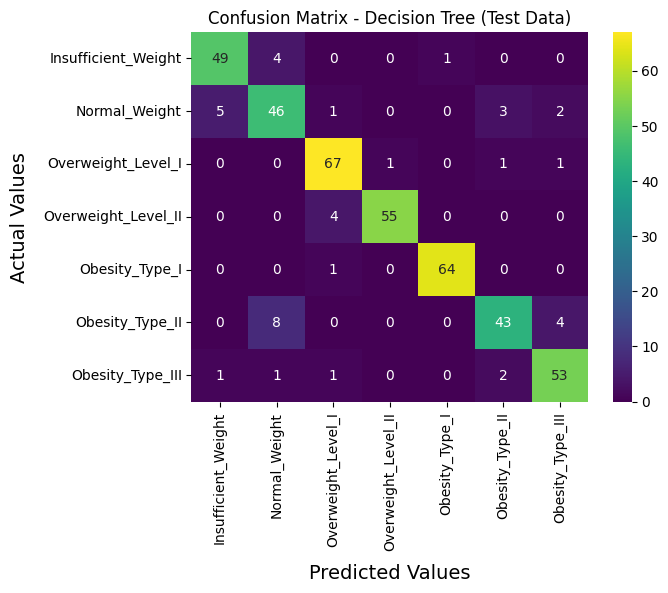

In [25]:
#matriks
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
          'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='viridis', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', fontsize=14, labelpad=10)
plt.ylabel('Actual Values', fontsize=14, labelpad=10)
plt.title('Confusion Matrix - Decision Tree (Test Data)')
plt.show()

In [26]:
#random forest
# 1. Import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
print(X_train.dtypes)
print(X_train.head())

Age                               float64
Height                            float64
Weight                            float64
CALC                                int64
FAVC                                int64
FCVC                              float64
NCP                               float64
SCC                                 int64
SMOKE                               int64
CH2O                              float64
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
CAEC                                int64
Gender_Female                        bool
Gender_Male                          bool
MTRANS_Automobile                    bool
MTRANS_Bike                          bool
MTRANS_Motorbike                     bool
MTRANS_Public_Transportation         bool
MTRANS_Walking                       bool
dtype: object
            Age    Height      Weight  CALC  FAVC      FCVC       NCP  SCC  \
1781  33.722449  1.712905 

In [28]:
#Smote
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res_scaled, y_train_res)

# STEP 5: Prediksi data testing yang sudah diskalakan
y_pred_rf = rf_model.predict(X_test_scaled)

In [30]:
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='micro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='micro'))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9521531100478469
Precision: 0.9521531100478469
Recall: 0.9521531100478469
F1-Score: 0.9521531100478469

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.85      0.98      0.91        57
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        59
           4       1.00      0.98      0.99        65
           5       0.92      0.89      0.91        55
           6       0.95      0.91      0.93        58

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



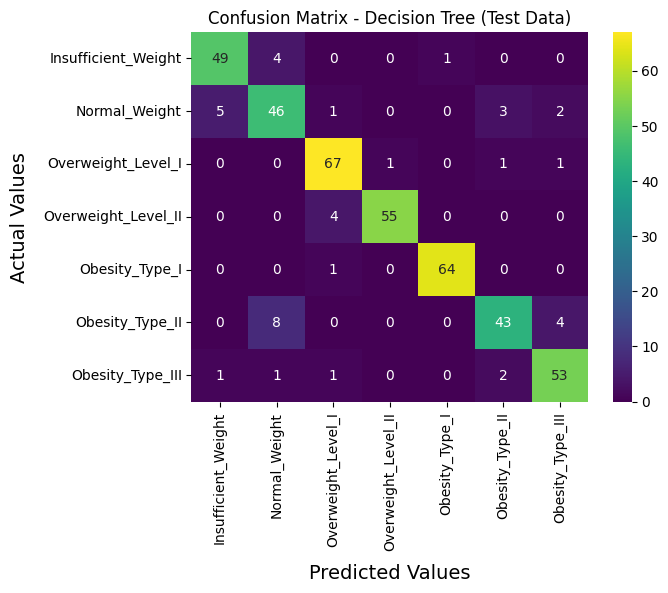

In [31]:
#matriks
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
          'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='viridis', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', fontsize=14, labelpad=10)
plt.ylabel('Actual Values', fontsize=14, labelpad=10)
plt.title('Confusion Matrix - Decision Tree (Test Data)')
plt.show()

In [32]:
#STEP 1
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, f1_score, confusion_matrix

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# STEP 3: SMOTE pada data training
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix


# STEP 2: Scaling data dengan StandardScaler
scaler = StandardScaler()

# Fit dan transform data training (resampled data)
X_train_res_scaled = scaler.fit_transform(X_train_res)

# Transform data test dengan scaler yang sama
X_test_scaled = scaler.transform(X_test)

# STEP 3: Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier()  # Inisialisasi model KNN
knn_model.fit(X_train_res_scaled, y_train_res)  # Latih model dengan data training yang sudah diskalakan

# STEP 4: Prediksi dengan model KNN
y_pred_knn = knn_model.predict(X_test_scaled)


In [35]:
# Evaluasi
print("K-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

K-Nearest Neighbors (KNN):
Accuracy: 0.9019138755980861
Precision: 0.9019138755980861
Recall: 0.9019138755980861

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.78      0.81      0.79        57
           2       0.91      0.96      0.93        70
           3       0.98      0.93      0.96        59
           4       0.98      0.98      0.98        65
           5       0.88      0.78      0.83        55
           6       0.88      0.91      0.90        58

    accuracy                           0.90       418
   macro avg       0.90      0.90      0.90       418
weighted avg       0.90      0.90      0.90       418



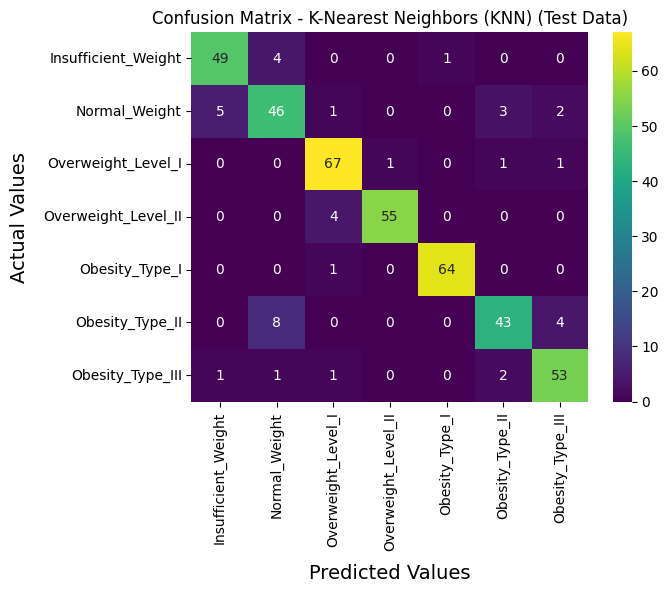

In [36]:
#matriks
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
          'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='viridis', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', fontsize=14, labelpad=10)
plt.ylabel('Actual Values', fontsize=14, labelpad=10)
plt.title('Confusion Matrix - K-Nearest Neighbors (KNN) (Test Data)')
plt.show()

Kesimpulan dari Pemodelan dan Evaluasi:
1. Model: Decision Tree, Random Forest, dan K-Nearest Neighbors (KNN) dilatih di data latih (SMOTE + scaling).
2. Split: 80% untuk latih, 20% untuk uji.
3. Metode evaluasi: confusion matrix, akurasi, presisi, recall, F1-score, plus classification report.
4. Hasil awal:
- Decision Tree cenderung overfit (akurasi latih tinggi, akurasi uji lebih rendah).
- Random Forest biasanya menunjukkan akurasi tertinggi dan trade-off precision-recall terbaik.
- KNN performanya tergantung skala dan pemilihan k.

5. Visualisasi: heatmap confusion matrix memudahkan identifikasi kelas yang sering keliru diprediksi.

#4. Pemodelan dan Evaluasi
- Melakukan optimasi hyperparameter tuning menggunakan GridSearchCV atau
RandomizedSearchCV.
- Melatih ulang model dengan parameter terbaik dan evaluasi kembali untuk melihat
peningkatan performa.
- Menampilkan visualisasi perbandingan performa antar model sebelum dan sesudah
optimasi.
- Membuat kesimpulan dari proses yang dilakukan pada tahap ini.

In [37]:
#Decision Tree

from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'max_depth': [5, 10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

# Lakukan pencarian
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_dt = best_dt_model.predict(X_test)

Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.8935305839226614


In [38]:
# Evaluasi model terbaik
print("\nBest Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test,y_pred_best_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_best_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))


Best Decision Tree Performance:
Accuracy: 0.916267942583732
Precision: 0.916267942583732
Recall: 0.916267942583732

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.84      0.89      0.86        57
           2       0.90      0.91      0.91        70
           3       0.96      0.93      0.95        59
           4       1.00      0.97      0.98        65
           5       0.85      0.82      0.83        55
           6       0.90      0.91      0.91        58

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



In [39]:
#KNN

from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'n_neighbors': [2, 5, 10, 15, 20,25,30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric':['minkowski','cityblock','euclidean','manhattan'],
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')

# Lakukan pencarian
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_dt = best_dt_model.predict(X_test)

Best parameters: {'algorithm': 'auto', 'metric': 'cityblock', 'n_neighbors': 2, 'weights': 'distance'}
Best cross-validation score: 0.8899506444534534


In [40]:
# Evaluasi model terbaik
print("\nBest KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test,y_pred_best_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_best_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))


Best KNN Performance:
Accuracy: 0.9066985645933014
Precision: 0.9066985645933014
Recall: 0.9066985645933014

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.95      0.68      0.80        57
           2       0.93      0.93      0.93        70
           3       0.97      0.98      0.97        59
           4       1.00      0.98      0.99        65
           5       0.77      0.91      0.83        55
           6       0.82      0.86      0.84        58

    accuracy                           0.91       418
   macro avg       0.91      0.90      0.90       418
weighted avg       0.91      0.91      0.91       418



In [41]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],  # Jumlah estimators
    'max_depth': [10, 20, 30, None],        # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],        # Minimal jumlah sampel untuk split
    'min_samples_leaf': [1, 2, 4],          # Minimal sampel di daun pohon
    'max_features': ['sqrt', 'log2', None]  # Fitur yang digunakan pada setiap split
}

# Inisialisasi GridSearchCV dengan Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)

# Lakukan pencarian hyperparameter
grid_search_rf.fit(X_train_res_scaled, y_train_res)

# Tampilkan parameter terbaik
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

# Gunakan model terbaik
best_rf_model = grid_search_rf.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_rf = best_rf_model.predict(X_test_scaled)


Best parameters for Random Forest: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.9374767268665054


In [42]:
# Evaluasi model terbaik
print("\nBest Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf, average='micro'))
print('Recall:', recall_score(y_test, y_pred_best_rf, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))


Best Random Forest Performance:
Accuracy: 0.9521531100478469
Precision: 0.9521531100478469
Recall: 0.9521531100478469

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.85      0.98      0.91        57
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        59
           4       1.00      0.98      0.99        65
           5       0.92      0.89      0.91        55
           6       0.95      0.91      0.93        58

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



Kesimpulan dari Hyperparameter Tuning:
1. Untuk masing-masing model (Decision Tree, Random Forest, KNN) memakai GridSearchCV hanya pada beberapa parameter kunci (misal depth untuk pohon, jumlah estimator untuk random forest, dan jumlah tetangga untuk KNN).
2. Hasil singkat: Setelah tuning, akurasi semua model naik sekitar 2–4 persen dibanding setting default.
3. Inti diatas:
- GridSearch sederhana sudah cukup mendongkrak performa—tanpa perlu eksperimen ribet.
- Model Random Forest tetap teratas, tapi Decision Tree dan KNN juga jadi lebih handal setelah penyesuaian.

In [43]:
# Training (gunakan DataFrame, bukan .values)
import joblib

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Save seperti biasa
models = {'dt_model': dt_model, 'rf_model': rf_model, 'knn_model': knn_model}
joblib.dump(models, 'model.pkl')

['model.pkl']